In [3]:
#pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas_datareader import data
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [4]:
'''Get Data'''

#df_raw = yf.download("^GSPC MMM ABT ACN ADBE AAP AES AFL A AKAM AGN ADS ALL GOOG MO AMZN AEE AIG APH APC AIV AAPL AMAT APTV ADM ARNC \
#                  T BBY COF CPRI CAH KMX CCL COST XRAY DVN", start='2009-12-30', end='2020-01-01', interval='1wk')

#APC is removed because it has been delisted; ARNC is removed because it underwent unknown restructuring in 2016, which leads to data \
#inconsistency (get different numbers from different databases(e.g. Yahoo Finance and WSJ))

df_raw = yf.download("^GSPC MMM ABT ACN ADBE AAP AES AFL A AKAM AGN ADS ALL GOOG MO AMZN AEE AIG APH AIV AAPL AMAT APTV ADM \
                       T BBY COF CPRI CAH KMX CCL COST XRAY DVN", start='2009-12-21', end='2020-01-01', interval='1wk')

df_unadj_close = df_raw['Close']
df_unadj_close.rename(columns={'^GSPC':'GSPC'},inplace=True)
df_unadj_close.dropna(how='all', inplace=True)

df_raw.drop(['Close'],axis=1,inplace=True)
df = df_raw.copy()
df_raw.head()

[*********************100%***********************]  34 of 34 completed


C:\Users\Alaaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
C:\Users\Alaaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Adj Close                                                         \
                    A        AAP       AAPL        ABT        ACN       ADBE   
Date                                                                           
2009-12-21  19.853561  40.208561  25.922182  18.125620  33.323753  37.169998   
2009-12-28  20.337967  39.390865  26.131752  18.072063  33.412315  36.779999   
2010-01-04  20.161219  39.546574  26.286753  18.426876  34.273785  36.689999   
2010-01-11  19.919027  38.252357  25.536520  18.574158  34.467014  35.869999   
2010-01-18  19.094250  38.670776  24.522150  18.526072  33.959789  34.380001   

                                                        ...      Volume       \
                  ADM        ADS        AEE        AES  ...        COST CPRI   
Date                                                    ...                    
2009-12-21  24.180721  61.544250  18.810987  10.952053  ...   9767300.0  NaN   
2009-12-28  23.981581  61.649242  18.428570  10.494733  ...   7084200.0  NaN   
2010-01-04  23.621582  64.598549  17.808790  10.865317  ...  16654800.0  NaN   
2010-01-11  23.391798  62.651432  18.026373  11.070323  ...  11222600.0  NaN   
2010-01-18  23.338188  58.528126  16.997801  10.266071  ...  14720200.0  NaN   

                                                                       \
                   DVN        GOOG        KMX         MMM          MO   
Date                                                                    
2009-12-21   9802300.0  14821800.0  6894800.0   7436800.0  53903500.0   
2009-12-28  10106600.0  11659400.0  4778800.0  10864500.0  35913600.0   
2010-01-04  16495000.0  40306500.0  7824800.0  19035100.0  69903500.0   
2010-01-11  13778400.0  56686000.0  6529800.0  15650000.0  64944200.0   
2010-01-18  11337600.0  41505700.0  9191900.0  17763800.0  65847800.0   

                                                  
                      T       XRAY         ^GSPC  
Date                                              
2009-12-21   68914500.0  2129300.0  1.205305e+10  
2009-12-28   71130700.0  1940100.0  9.561710e+09  
2010-01-04  163499400.0  5309600.0  2.111535e+10  
2010-01-11  200954300.0  4194200.0  2.181623e+10  
2010-01-18  151503300.0  4684100.0  2.261833e+10  

[5 rows x 170 columns]

In [5]:
'''Delete most null values'''

#df[df['Adj Close']['A'].isnull()==True]
df = df.dropna(how='all')
df.head()

Adj Close                                                         \
                    A        AAP       AAPL        ABT        ACN       ADBE   
Date                                                                           
2009-12-21  19.853561  40.208561  25.922182  18.125620  33.323753  37.169998   
2009-12-28  20.337967  39.390865  26.131752  18.072063  33.412315  36.779999   
2010-01-04  20.161219  39.546574  26.286753  18.426876  34.273785  36.689999   
2010-01-11  19.919027  38.252357  25.536520  18.574158  34.467014  35.869999   
2010-01-18  19.094250  38.670776  24.522150  18.526072  33.959789  34.380001   

                                                        ...      Volume       \
                  ADM        ADS        AEE        AES  ...        COST CPRI   
Date                                                    ...                    
2009-12-21  24.180721  61.544250  18.810987  10.952053  ...   9767300.0  NaN   
2009-12-28  23.981581  61.649242  18.428570  10.494733  ...   7084200.0  NaN   
2010-01-04  23.621582  64.598549  17.808790  10.865317  ...  16654800.0  NaN   
2010-01-11  23.391798  62.651432  18.026373  11.070323  ...  11222600.0  NaN   
2010-01-18  23.338188  58.528126  16.997801  10.266071  ...  14720200.0  NaN   

                                                                       \
                   DVN        GOOG        KMX         MMM          MO   
Date                                                                    
2009-12-21   9802300.0  14821800.0  6894800.0   7436800.0  53903500.0   
2009-12-28  10106600.0  11659400.0  4778800.0  10864500.0  35913600.0   
2010-01-04  16495000.0  40306500.0  7824800.0  19035100.0  69903500.0   
2010-01-11  13778400.0  56686000.0  6529800.0  15650000.0  64944200.0   
2010-01-18  11337600.0  41505700.0  9191900.0  17763800.0  65847800.0   

                                                  
                      T       XRAY         ^GSPC  
Date                                              
2009-12-21   68914500.0  2129300.0  1.205305e+10  
2009-12-28   71130700.0  1940100.0  9.561710e+09  
2010-01-04  163499400.0  5309600.0  2.111535e+10  
2010-01-11  200954300.0  4194200.0  2.181623e+10  
2010-01-18  151503300.0  4684100.0  2.261833e+10  

[5 rows x 170 columns]

In [6]:
'''Segregate adjusted close price data'''

df_close = df['Adj Close']
df_close.rename(columns={'^GSPC':'GSPC'},inplace=True)

df_close.head()

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,COST,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY,GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-21,19.853561,40.208561,25.922182,18.125620,33.323753,37.169998,24.180721,61.544250,18.810987,10.952053,...,46.785721,NaN,63.557270,308.085236,24.230000,63.159489,11.769064,16.023712,33.008915,1126.479980
2009-12-28,20.337967,39.390865,26.131752,18.072063,33.412315,36.779999,23.981581,61.649242,18.428570,10.494733,...,45.832966,NaN,63.975037,308.832428,24.250000,63.251263,11.341519,15.983793,32.961678,1115.099976
2010-01-04,20.161219,39.546574,26.286753,18.426876,34.273785,36.689999,23.621582,64.598549,17.808790,10.865317,...,45.918163,NaN,66.255508,299.885956,24.309999,64.513718,11.816070,15.453469,33.364693,1144.979980
2010-01-11,19.919027,38.252357,25.536520,18.574158,34.467014,35.869999,23.391798,62.651432,18.026373,11.070323,...,45.538624,NaN,63.565952,288.917053,22.559999,63.786869,11.998218,14.926903,33.692715,1136.030029
2010-01-18,19.094250,38.670776,24.522150,18.526072,33.959789,34.380001,23.338188,58.528126,16.997801,10.266071,...,44.206306,NaN,60.319332,273.978058,21.290001,62.340828,11.581039,14.695388,32.277523,1091.760010


In [7]:
'''Calculate (natural base) log return'''

tickers = ['GSPC', 'MMM', 'ABT', 'ACN', 'ADBE', 'AAP', 'AES', 'AFL', 'A', 'AKAM', 'AGN', 'ADS', 'ALL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AIG',\
           'APH', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'T', 'BBY', 'COF', 'CPRI', 'CAH', 'KMX', 'CCL', 'COST', 'XRAY', 'DVN']

df_ln_return = df_close.copy()

def calculate_ln_return(ticker):
    df_ln_return[ticker] = np.log(df_close[ticker]/df_close[ticker].shift(1))
    return None

for ticker in tickers:
    calculate_ln_return(ticker)

df_ln_return.dropna(how='all',inplace=True)
#df_ln_return.dropna(how='all',axis=1,inplace=True)

'''Replace missing values with cross-section mean(APTV and CPRI were listed on 11/18/2011 and 12/16/2011 respectively)'''

df_ln_return = df_ln_return.T
df_ln_return.fillna(df_ln_return.mean(), inplace = True)
df_ln_return = df_ln_return.T

df_ln_return.head()

,A,AAP,AAPL,ABT,ACN,ADBE,ADM,ADS,AEE,AES,...,COST,CPRI,DVN,GOOG,KMX,MMM,MO,T,XRAY,GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-28,0.024106,-0.020546,0.008052,-0.002959,0.002654,-0.010548,-0.008270,0.001705,-0.020539,-0.042653,...,-0.020574,-0.010751,0.006552,0.002422,0.000825,0.001452,-0.037004,-0.002494,-0.001432,-0.010154
2010-01-04,-0.008729,0.003945,0.005914,0.019443,0.025456,-0.002450,-0.015125,0.046731,-0.034210,0.034702,...,0.001857,0.015597,0.035026,-0.029397,0.002471,0.019763,0.040990,-0.033742,0.012153,0.026443
2010-01-11,-0.012085,-0.033274,-0.028956,0.007961,0.005622,-0.022603,-0.009775,-0.030605,0.012144,0.018692,...,-0.008300,-0.013384,-0.041441,-0.037263,-0.074709,-0.011331,0.015298,-0.034668,0.009783,-0.007847
2010-01-18,-0.042288,0.010879,-0.040533,-0.002592,-0.014826,-0.042426,-0.002294,-0.068079,-0.058752,-0.075424,...,-0.029693,-0.041661,-0.052425,-0.053092,-0.057941,-0.022931,-0.035389,-0.015631,-0.042911,-0.039749
2010-01-25,-0.039866,-0.007324,-0.029195,-0.029225,-0.028618,-0.062408,-0.016545,-0.030802,-0.008962,-0.030412,...,0.006288,-0.019527,-0.035096,-0.037173,-0.031491,-0.012224,0.007581,-0.001182,-0.026778,-0.016522


In [13]:
'''Create a function that does pre-processes panel data'''

def Split_Panel_Data_Preparations(df):
    df = df.T
    df.reset_index(inplace=True)
    df.rename(columns={'index':'Ticker'},inplace=True)
    for i in range(1,df.shape[1]):
        new_date=str(df.columns[i])[:4]+\
                 str(df.columns[i])[5:7]+\
                 str(df.columns[i])[8:10]
        df.rename(columns={df.columns[i]: str(i)+'_'+new_date},inplace=True)
    return df

In [14]:
df_ln_return_copy = df_ln_return.copy()
df_ln_return_copy = Split_Panel_Data_Preparations(df_ln_return_copy)
df_ln_return_copy.drop(33,inplace=True)
df_ln_return_copy.head()

Date,Ticker,1_20091228,2_20100104,3_20100111,4_20100118,5_20100125,6_20100201,7_20100208,8_20100215,9_20100222,...,514_20191028,515_20191104,516_20191111,517_20191118,518_20191125,519_20191202,520_20191209,521_20191216,522_20191223,523_20191230
0,A,0.024106,-0.008729,-0.012085,-0.042288,-0.039866,0.039866,0.027390,0.039887,0.008299,...,0.020741,-0.004297,0.020917,0.010929,0.020640,0.017671,0.018082,0.017526,0.002696,-0.001289
1,AAP,-0.020546,0.003945,-0.033274,0.010879,-0.007324,0.031685,0.050052,-0.067892,0.019803,...,-0.004480,0.015532,-0.028724,-0.029890,-0.005017,-0.015785,0.003809,0.018575,0.001833,0.011366
2,AAPL,0.008052,0.005914,-0.028956,-0.040533,-0.029195,0.017547,0.024860,0.006417,0.014522,...,0.036788,0.016746,0.024371,-0.015089,0.020680,0.012863,0.016268,0.015471,0.036403,0.013198
3,ABT,-0.002959,0.019443,0.007961,-0.002592,-0.029225,0.019270,-0.000742,0.008309,-0.001841,...,0.012294,0.012981,0.023253,-0.023253,0.020215,0.000351,0.010126,0.003584,0.008503,-0.006198
4,ACN,0.002654,0.025456,0.005622,-0.014826,-0.028618,-0.011039,-0.001234,0.009341,-0.022267,...,0.027743,0.007832,0.036795,-0.000762,0.022624,0.006886,0.020088,0.021257,0.005292,-0.007805


In [15]:
'''Split panel data to multiple cross-sections'''
for i in range(df_ln_return_copy.shape[1]-1):
    exec("df_ln_return_%s=df_ln_return_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_ln_return_%s.rename(columns={df_ln_return_copy.columns[i+1]:'ln_return'},inplace=True)"%(i+1))
    exec("df_ln_return_%s.rename(columns={'Ticker':df_ln_return_copy.columns[i+1]},inplace=True)"%(i+1))

df_ln_return_1.head()

Date,1_20091228,ln_return
0,A,0.024106
1,AAP,-0.020546
2,AAPL,0.008052
3,ABT,-0.002959
4,ACN,0.002654


In [16]:
'''ATR'''
df_H = df['High']
df_H.rename(columns={'^GSPC':'GSPC'},inplace=True)
df_L = df['Low']
df_L.rename(columns={'^GSPC':'GSPC'},inplace=True)
df_HL = df_H - df_L
df_HC = (df_H - df_unadj_close.shift(1)).abs()
df_LC = (df_L - df_unadj_close.shift(1)).abs()

df_ATR = df_HL
for i in range(df_ATR.shape[0]):
    for j in range(df_ATR.shape[1]):
        df_ATR.iloc[i,j] = max(df_HL.iloc[i,j], df_HC.iloc[i,j], df_LC.iloc[i,j])

df_ATR = df_ATR[1:]
df_ATR = df_ATR.T
df_ATR.fillna(df_ATR.mean(), inplace = True)
df_ATR = df_ATR.T
df_ATR.dropna(how='all',inplace=True)

df_ATR_copy = df_ATR.copy()
df_ATR_copy = Split_Panel_Data_Preparations(df_ATR_copy)
df_ATR_copy.drop(33, inplace=True)

for i in range(df_ATR_copy.shape[1]-1):
    exec("df_ATR_%s=df_ATR_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_ATR_%s.rename(columns={df_ATR_copy.columns[i+1]:'ATR'},inplace=True)"%(i+1))
    exec("df_ATR_%s.rename(columns={'Ticker':df_ATR_copy.columns[i+1]},inplace=True)"%(i+1))

df_ATR_copy.head()

Date,Ticker,1_20091228,2_20100104,3_20100111,4_20100118,5_20100125,6_20100201,7_20100208,8_20100215,9_20100222,...,514_20191028,515_20191104,516_20191111,517_20191118,518_20191125,519_20191202,520_20191209,521_20191216,522_20191223,523_20191230
0,A,1.323320,0.879829,0.937052,1.444921,1.237482,1.330471,1.409157,0.929899,0.922747,...,2.409996,2.909996,2.180000,2.180000,3.379997,3.250000,3.430000,1.949997,0.919998,0.779999
1,AAP,1.180000,1.490002,1.980000,2.259998,1.580002,2.279999,2.480000,4.000000,1.029999,...,6.910004,6.770004,17.669998,7.239990,3.930008,7.750000,7.339996,5.460007,5.160004,2.880005
2,AAPL,0.805714,0.934284,1.271429,2.627142,3.351429,1.335714,1.091429,0.561430,1.351429,...,18.669998,5.070007,7.500000,7.600006,6.220001,14.709991,10.389984,7.500000,14.529999,8.459991
3,ABT,0.494194,0.719700,0.369446,1.146723,1.257076,0.882832,0.638134,0.590155,0.446213,...,2.699997,2.989998,2.440002,3.540001,2.230003,2.640007,2.949997,3.239998,1.470001,1.520004
4,ACN,0.669998,1.560001,1.419998,2.000000,1.600002,2.139999,1.169998,1.189999,1.540001,...,5.980011,4.720001,9.009995,4.659988,5.000000,6.350006,6.380005,11.190002,3.790009,3.190002


[Text(0, 0, '0.00%'),
 Text(0, 0, '1,000.00%'),
 Text(0, 0, '2,000.00%'),
 Text(0, 0, '3,000.00%'),
 Text(0, 0, '4,000.00%'),
 Text(0, 0, '5,000.00%'),
 Text(0, 0, '6,000.00%')]

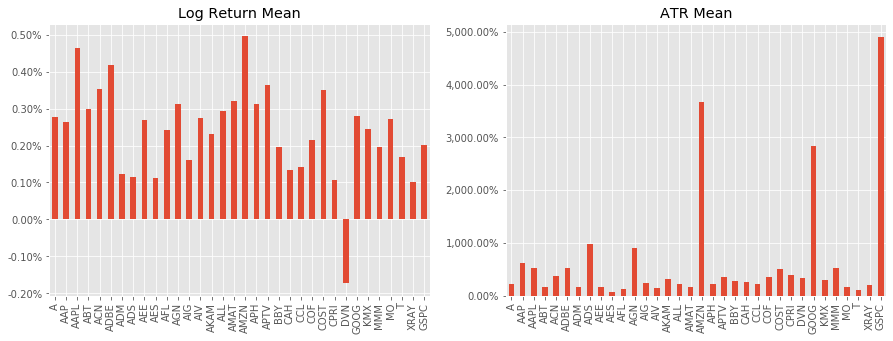

In [42]:
fig_descriptive, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (15,5))

df_ln_return.describe().iloc[1].plot(kind='bar', ax=ax0)
ax0.set(title="Log Return Mean")
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_ATR.describe().iloc[1].plot(kind='bar', ax=ax1)
ax1.set(title="ATR Mean")
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in ax1.get_yticks()])

In [19]:
'''Technical Factors'''
df_excess_sp500_return = df_ln_return.copy()
for i in range(df_excess_sp500_return.shape[1]):
    df_excess_sp500_return.iloc[:,i] = df_excess_sp500_return.iloc[:,i] - df_excess_sp500_return['GSPC']
df_excess_sp500_return_1wk = df_excess_sp500_return.shift(1)
df_excess_sp500_return_1mo = df_excess_sp500_return.rolling(window=4, min_periods=4).sum()
df_excess_sp500_return_1yr = df_excess_sp500_return.rolling(window=50, min_periods=50).sum()

In [20]:
df_excess_sp500_return_1wk = Split_Panel_Data_Preparations(df_excess_sp500_return_1wk)
df_excess_sp500_return_1mo = Split_Panel_Data_Preparations(df_excess_sp500_return_1mo)
df_excess_sp500_return_1yr = Split_Panel_Data_Preparations(df_excess_sp500_return_1yr)

for i in range(df_excess_sp500_return_1wk.shape[1]-1):
    exec("df_excess_sp500_return_1wk_%s=df_excess_sp500_return_1wk.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_excess_sp500_return_1wk_%s.rename(columns={df_excess_sp500_return_1wk.columns[i+1]:'exsp_return_1wk'},inplace=True)"%(i+1))
    exec("df_excess_sp500_return_1wk_%s.rename(columns={'Ticker':df_excess_sp500_return_1wk.columns[i+1]},inplace=True)"%(i+1))

for i in range(df_excess_sp500_return_1mo.shape[1]-1):
    exec("df_excess_sp500_return_1mo_%s=df_excess_sp500_return_1mo.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_excess_sp500_return_1mo_%s.rename(columns={df_excess_sp500_return_1mo.columns[i+1]:'exsp_return_1mo'},inplace=True)"%(i+1))
    exec("df_excess_sp500_return_1mo_%s.rename(columns={'Ticker':df_excess_sp500_return_1mo.columns[i+1]},inplace=True)"%(i+1))

for i in range(df_excess_sp500_return_1yr.shape[1]-1):
    exec("df_excess_sp500_return_1yr_%s=df_excess_sp500_return_1yr.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_excess_sp500_return_1yr_%s.rename(columns={df_excess_sp500_return_1yr.columns[i+1]:'exsp_return_1yr'},inplace=True)"%(i+1))
    exec("df_excess_sp500_return_1yr_%s.rename(columns={'Ticker':df_excess_sp500_return_1yr.columns[i+1]},inplace=True)"%(i+1))

In [21]:
'''Liquidity Factor'''
df_volume = df['Volume'][1:]
df_volume.drop(['^GSPC'],axis=1,inplace=True)

df_MktCap = pd.read_csv("df_MktCap.csv")
df_MktCap.drop(['ARNC'],axis=1,inplace=True)
df_MktCap.set_index('Date',inplace=True)

df_volume_MktCap_ratio = df_volume.copy()
for ticker in df_volume.columns:
    df_volume_MktCap_ratio[ticker] = df_volume[ticker].rolling(window=50, min_periods=50).mean()/df_MktCap[ticker]

df_volume_MktCap_ratio_copy = df_volume_MktCap_ratio.copy()
df_volume_MktCap_ratio_copy = Split_Panel_Data_Preparations(df_volume_MktCap_ratio_copy)
df_volume_MktCap_ratio_copy.fillna(df_volume_MktCap_ratio_copy.mean(), inplace = True)

for i in range(df_volume_MktCap_ratio_copy.shape[1]-1):
    exec("df_volume_MktCap_ratio_%s=df_volume_MktCap_ratio_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_volume_MktCap_ratio_%s.rename(columns={df_volume_MktCap_ratio_copy.columns[i+1]:'Liquidity'},inplace=True)"%(i+1))
    exec("df_volume_MktCap_ratio_%s.rename(columns={'Ticker':df_volume_MktCap_ratio_copy.columns[i+1]},inplace=True)"%(i+1))

In [22]:
'''Price Level Factor'''
df_EPS = pd.read_csv('df_EPS.csv')
df_EPS.drop(['ARNC'], axis=1, inplace=True)
df_EPS.set_index('Date',inplace=True)

df_earningstoprice_ratio = df_close.copy()
for ticker in df_EPS.columns:
    df_earningstoprice_ratio[ticker] = df_EPS[ticker]/df_close[ticker]

df_earningstoprice_ratio_copy = df_earningstoprice_ratio.copy()
df_earningstoprice_ratio_copy = Split_Panel_Data_Preparations(df_earningstoprice_ratio_copy)
df_earningstoprice_ratio_copy.drop(33, inplace=True)
df_earningstoprice_ratio_copy.fillna(df_earningstoprice_ratio_copy.mean(), inplace = True)

for i in range(df_earningstoprice_ratio_copy.shape[1]-1):
    exec("df_earningstoprice_ratio_%s=df_earningstoprice_ratio_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_earningstoprice_ratio_%s.rename(columns={df_earningstoprice_ratio_copy.columns[i+1]:'E2P'},inplace=True)"%(i+1))
    exec("df_earningstoprice_ratio_%s.rename(columns={'Ticker':df_earningstoprice_ratio_copy.columns[i+1]},inplace=True)"%(i+1))

In [23]:
'''Growth Factor'''
df_ROA = pd.read_csv('df_ROA.csv')
df_ROA.drop(['ARNC'], axis=1, inplace=True)
df_ROA.set_index('Date',inplace=True)
df_ROA.index = df_ln_return.index

df_ROA_copy = df_ROA.copy()
df_ROA_copy = Split_Panel_Data_Preparations(df_ROA_copy)
df_ROA_copy.fillna(df_ROA_copy.mean(), inplace = True)

for i in range(df_ROA_copy.shape[1]-1):
    exec("df_ROA_%s=df_ROA_copy.iloc[:,[0,%d]]"%(i+1,i+1))
    exec("df_ROA_%s.rename(columns={df_ROA_copy.columns[i+1]:'ROA'},inplace=True)"%(i+1))
    exec("df_ROA_%s.rename(columns={'Ticker':df_ROA_copy.columns[i+1]},inplace=True)"%(i+1))

In [24]:
'''Add Independent Variable Data to Each Cross-section Dataframe'''
for i in range(1, df_ln_return_copy.shape[1]-1):
    exec("df_ln_return_%s['ATR']=df_ATR_%s['ATR']"%(i+1,i))
    exec("df_ln_return_%s['exsp_return_1wk']=df_excess_sp500_return_1wk_%s['exsp_return_1wk']"%(i+1,i))
    exec("df_ln_return_%s['exsp_return_1mo']=df_excess_sp500_return_1mo_%s['exsp_return_1mo']"%(i+1,i))
    exec("df_ln_return_%s['exsp_return_1yr']=df_excess_sp500_return_1yr_%s['exsp_return_1yr']"%(i+1,i))
    exec("df_ln_return_%s['Liquidity']=df_volume_MktCap_ratio_%s['Liquidity']"%(i+1,i))
    exec("df_ln_return_%s['E2P']=df_earningstoprice_ratio_%s['E2P']"%(i+1,i))
    exec("df_ln_return_%s['ROA']=df_ROA_%s['ROA']"%(i+1,i))

C:\Users\Alaaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
'''Load in the dataframe that stores the result'''

df_res = pd.read_csv('df_res.csv')
df_res.rename(columns={'Unnamed: 0':' '},inplace=True)
df_res.set_index(' ', inplace=True)
df_res

,1,2,3,4,5,6,7,8,9,10,...,464,465,466,467,468,469,470,471,472,473
,,,,,,,,,,,,,,,,,,,,,
vol_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
exsp_return_1wk_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
exsp_return_1mo_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
exsp_return_1yr_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Liquidity_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E2P_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ROA_coef,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vol_p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
exsp_return_1wk_p,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
'''Cross-section regressions'''
for i in range(51,524):
#from 12/13/2010 to 12/30/2019
    exec("Exog = sm.add_constant(df_ln_return_%s[['ATR', 'exsp_return_1wk', 'exsp_return_1mo', 'exsp_return_1yr', 'Liquidity', 'E2P', 'ROA']],\
                                 prepend=False)"%i)
    exec("model = sm.OLS(df_ln_return_%s['ln_return'], Exog, data=df_ln_return_%s)"%(i,i))
    
    res = model.fit()
    res_as_html = res.summary().tables[1].as_html()
    res_as_df = pd.read_html(res_as_html, header=0, index_col=0)[0]
    res_as_html_2 = res.summary().tables[0].as_html()
    res_as_df_2 = pd.read_html(res_as_html_2, header=0, index_col=0)[0]

    ATR_coef = res_as_df['coef'][0]
    exsp_return_1wk_coef = res_as_df['coef'][1]
    exsp_return_1mo_coef = res_as_df['coef'][2]
    exsp_return_1yr_coef = res_as_df['coef'][3]
    Liquidity_coef = res_as_df['coef'][4]
    E2P_coef = res_as_df['coef'][5]
    ROA_coef = res_as_df['coef'][6]

    df_res.iloc[0,i-51] = ATR_coef
    df_res.iloc[1,i-51] = exsp_return_1wk_coef
    df_res.iloc[2,i-51] = exsp_return_1mo_coef
    df_res.iloc[3,i-51] = exsp_return_1yr_coef
    df_res.iloc[4,i-51] = Liquidity_coef
    df_res.iloc[5,i-51] = E2P_coef
    df_res.iloc[6,i-51] = ROA_coef

    ATR_p = res_as_df['P>|t|'][0]
    exsp_return_1wk_p = res_as_df['P>|t|'][1]
    exsp_return_1mo_p = res_as_df['P>|t|'][2]
    exsp_return_1yr_p = res_as_df['P>|t|'][3]
    Liquidity_p = res_as_df['P>|t|'][4]
    E2P_p = res_as_df['P>|t|'][5]
    ROA_p = res_as_df['P>|t|'][6]

    df_res.iloc[7,i-51] = ATR_p
    df_res.iloc[8,i-51] = exsp_return_1wk_p
    df_res.iloc[9,i-51] = exsp_return_1mo_p
    df_res.iloc[10,i-51] = exsp_return_1yr_p
    df_res.iloc[11,i-51] = Liquidity_p
    df_res.iloc[12,i-51] = E2P_p
    df_res.iloc[13,i-51] = ROA_p

    Adj_R2 = res_as_df_2.iloc[0,2]
    Prob_F = res_as_df_2.iloc[2,2]

    df_res.iloc[14,i-51] = Adj_R2
    df_res.iloc[15,i-51] = Prob_F

Dates = df_ln_return.index
#Dates[0].strftime('%D')

df_res_copy = df_res.T
df_res_copy['Dates'] = Dates[-473:]

In [46]:
df_res_copy

,vol_coef,exsp_return_1wk_coef,exsp_return_1mo_coef,exsp_return_1yr_coef,Liquidity_coef,E2P_coef,ROA_coef,vol_p,exsp_return_1wk_p,exsp_return_1mo_p,exsp_return_1yr_p,Liquidity_p,E2P_p,ROA_p,Adj_R2,Prob_F,Dates
1,0.002200,0.5460,0.2201,-0.0065,-3.397000e-06,0.0114,0.0385,0.638,0.275,0.499,0.896,0.639,0.634,0.838,-0.025,0.53000,2010-12-13
2,-0.003600,0.5003,-0.0913,-0.0690,3.150000e-06,-0.0181,-0.1733,0.289,0.051,0.439,0.029,0.496,0.272,0.140,0.153,0.12700,2010-12-20
3,-0.001100,-0.1155,0.1396,0.0151,-2.587000e-08,0.0076,-0.0501,0.400,0.089,0.001,0.198,0.989,0.241,0.276,0.295,0.02260,2010-12-27
4,0.009900,0.1834,-0.0349,-0.0387,6.606000e-06,0.0033,0.0608,0.020,0.350,0.690,0.203,0.198,0.812,0.571,0.105,0.20100,2011-01-03
5,-0.002900,-1.4282,0.0089,-0.0429,6.373000e-06,-0.0340,-0.0445,0.223,0.004,0.919,0.141,0.205,0.030,0.639,0.464,0.00128,2011-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,-0.000300,0.0503,-0.0004,-0.0126,8.016000e-06,-0.0495,-0.0739,0.354,0.743,0.997,0.589,0.128,0.472,0.439,-0.012,0.49100,2019-12-02
470,-0.000029,0.5780,0.0763,0.0009,5.784000e-06,0.0722,-0.0499,0.907,0.002,0.523,0.969,0.259,0.305,0.599,0.221,0.05950,2019-12-09
471,0.000300,0.1039,0.1667,0.0253,1.098000e-05,0.1228,-0.0679,0.703,0.706,0.182,0.412,0.112,0.094,0.560,0.047,0.32600,2019-12-16
472,0.000900,-0.2109,0.1680,0.0039,-1.555000e-06,0.0281,-0.0028,0.009,0.232,0.025,0.802,0.667,0.446,0.966,0.234,0.05040,2019-12-23


[Text(0.5, 1.0, 'Time series of Prob(F)')]

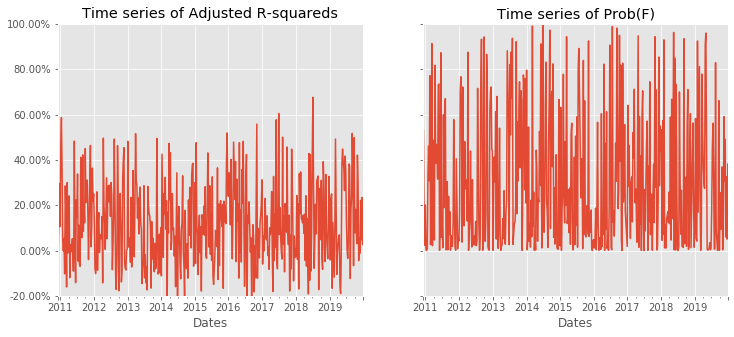

In [47]:
'''Plots of regression quality'''
fig_res_R2, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (12,5), sharey=True)

df_res_copy.plot(x='Dates', y='Adj_R2', ax=ax0, legend=False)
ax0.set(title='Time series of Adjusted R-squareds')
ax0.set_ylim(-0.2, 1)
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_res_copy.plot(x='Dates', y='Prob_F', ax=ax1, legend=False)
ax1.set(title='Time series of Prob(F)')

[Text(0.5, 1.0, 'Distribution of coefficients of ATR')]

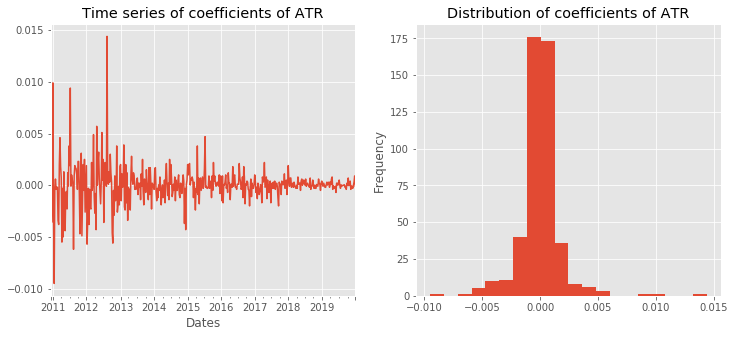

In [50]:
'''Plots of standard deviation coefficients'''
fig_res_vol, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (12,5))

df_res_copy.plot(x='Dates', y='vol_coef', ax=ax0, legend=False)
ax0.set(title="Time series of coefficients of ATR")

df_res_copy.plot(kind='hist', y='vol_coef', bins=20, ax=ax1, legend=False)
ax1.set(title="Distribution of coefficients of ATR")

In [48]:
(df_res_copy['vol_coef'].skew(), df_res_copy['vol_coef'].mean())

(1.115845893659528, 2.653262410147991e-05)

In [52]:
'''Calculate moving averages of coefficients and make predictions'''
df_coef_ma = df_res_copy.rolling(window=50, min_periods=50).mean()[49:]

#Cross-section regression used rolling on a basis of 50, then used variables at t-1 to regress variables at t, so the first 50 cross-sections\
#are removed; prediction used another rolling,so 51 to 99 cross-sections are removed. Also, we cannot add realized return for the last cross-section.
for i in range(100, 523):
    
    for j in df_coef_ma.columns[:7]:
        exec("df_ln_return_%s[j] = df_coef_ma.loc[str(%d),j]"%(i,i-49))
        
    exec("df_ln_return_%s['E_return'] = df_ln_return_%s['ATR']*df_ln_return_%s['vol_coef'] + \
                                        df_ln_return_%s['exsp_return_1wk']*df_ln_return_%s['exsp_return_1wk_coef'] + \
                                        df_ln_return_%s['exsp_return_1mo']*df_ln_return_%s['exsp_return_1mo_coef'] + \
                                        df_ln_return_%s['exsp_return_1yr']*df_ln_return_%s['exsp_return_1yr_coef'] + \
                                        df_ln_return_%s['Liquidity']*df_ln_return_%s['Liquidity_coef'] + \
                                        df_ln_return_%s['E2P']*df_ln_return_%s['E2P_coef'] + \
                                        df_ln_return_%s['ROA']*df_ln_return_%s['ROA_coef']"%(i,i,i,i,i,i,i,i,i,i,i,i,i,i,i))
    exec("df_ln_return_%s['Realized_return'] = df_ln_return_%s['ln_return']"%(i,i+1))

C:\Users\Alaaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
'''Split stocks into 3 tiers, sorted on expected returns'''
dict_tiers = {'Expected_return': {}, 'Realized_return':{}, 'Volatility':{}}

for i in range(100,523):
    exec("df_sort = df_ln_return_%s.sort_values(by='E_return', ascending=False)"%i)
    dict_tiers['Expected_return'][i] = {}
    dict_tiers['Realized_return'][i] = {}
    dict_tiers['Volatility'][i] = {}
    dict_tiers['Expected_return'][i][1] = df_sort[0:11]['E_return'].mean()
    dict_tiers['Expected_return'][i][2] = df_sort[11:22]['E_return'].mean()
    dict_tiers['Expected_return'][i][3] = df_sort[22:33]['E_return'].mean()
    dict_tiers['Realized_return'][i][1] = df_sort[0:11]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][2] = df_sort[11:22]['Realized_return'].mean()
    dict_tiers['Realized_return'][i][3] = df_sort[22:33]['Realized_return'].mean()
    dict_tiers['Volatility'][i][1] = df_sort[0:11]['ATR'].abs().mean()
    dict_tiers['Volatility'][i][2] = df_sort[11:22]['ATR'].abs().mean()
    dict_tiers['Volatility'][i][3] = df_sort[22:33]['ATR'].abs().mean()

    
df_E_return_tiers = pd.DataFrame(dict_tiers['Expected_return']).T
df_R_return_tiers = pd.DataFrame(dict_tiers['Realized_return']).T
df_ATR_tiers = pd.DataFrame(dict_tiers['Volatility']).T

df_E_return_tiers.rename(columns={1:'E_high', 2:'E_medium', 3:'E_low'}, inplace = True)
df_R_return_tiers.rename(columns={1:'R_high', 2:'R_medium', 3:'R_low'}, inplace = True)
df_ATR_tiers.rename(columns={1:'Vol_high', 2:'Vol_medium', 3:'Vol_low'}, inplace = True)

df_E_return_tiers['dates'] = Dates[99:522]
df_R_return_tiers['dates'] = Dates[99:522]
df_ATR_tiers['dates'] = Dates[99:522]

df_pred = df_E_return_tiers.merge(df_R_return_tiers, how='outer', on='dates')
df_pred = df_pred.merge(df_ATR_tiers, how='outer', on='dates')
df_pred['GSPC'] = pd.Series(df_ln_return[-424:-1].reset_index()['GSPC'])

[]

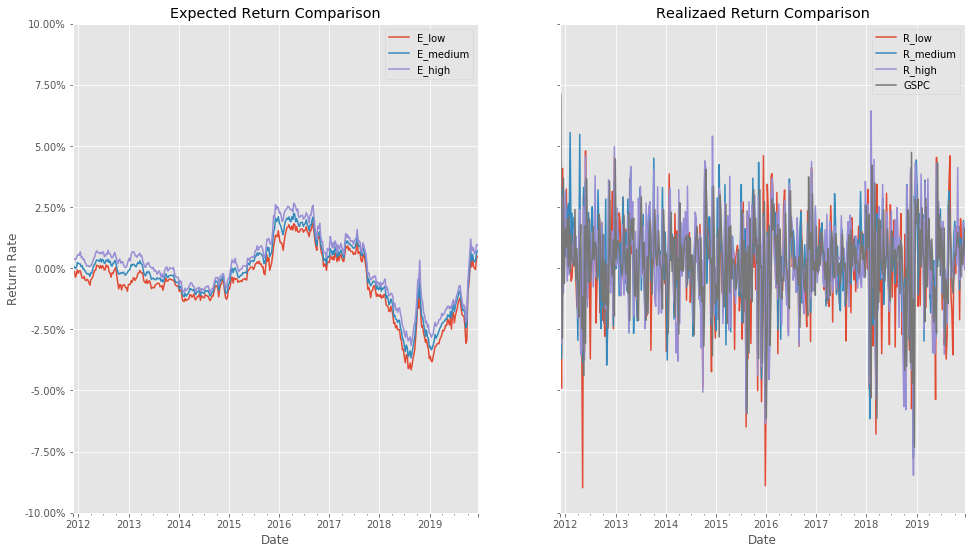

In [54]:
'''Compare S&P500 returns with realized returns in 3 tiers '''
fig_R_return_comp, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, figsize = (16,9), sharey=True)

df_pred.plot(x='dates', y=['E_low', 'E_medium', 'E_high'], ax=ax0)
ax0.set(xlabel='Date', ylabel='Return Rate', title="Expected Return Comparison")
ax0.set_ylim(-0.1, 0.1)
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_pred.plot(x='dates', y=['R_low', 'R_medium', 'R_high', 'GSPC'], ax=ax1)
ax1.set(xlabel='Date', title="Realizaed Return Comparison")
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in ax1.get_yticks()])

In [55]:
print(df_pred['R_high'].skew(), df_pred['R_high'].mean())
print(df_pred['R_medium'].skew(), df_pred['R_medium'].mean())
print(df_pred['R_low'].skew(), df_pred['R_low'].mean())
(df_pred['GSPC'].skew(), df_pred['GSPC'].mean())

-0.37510140619559695 0.003848447271737031
-0.4094556786926137 0.0037449536459724726
-0.7543471844350894 0.0008678428529259028


(-0.6191067566370866, 0.0023174954501271323)

In [60]:
df_pred.describe()

,E_high,E_medium,E_low,R_high,R_medium,R_low,Vol_high,Vol_medium,Vol_low,GSPC
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,0.000305,-0.002895,-0.006061,0.003848,0.003745,0.000868,7.918985,4.258950,4.463465,0.002317
std,0.012676,0.012815,0.012986,0.020703,0.019508,0.021270,6.944017,2.304555,2.982817,0.017508
min,-0.031555,-0.036706,-0.041577,-0.084641,-0.077490,-0.089752,1.226231,1.135877,0.894495,-0.073122
25%,-0.007735,-0.009659,-0.011883,-0.007626,-0.007619,-0.010132,3.157462,2.778252,2.473661,-0.006127
50%,0.001359,-0.001887,-0.005070,0.005131,0.005592,0.003743,5.048098,3.705455,3.643637,0.003340
75%,0.007345,0.004953,0.001810,0.016091,0.015357,0.013930,10.670179,5.193182,5.415482,0.012584
max,0.026558,0.022433,0.018487,0.083901,0.071977,0.065141,39.180907,17.755367,25.496359,0.071284


[Text(0, 0, '-10.00%'),
 Text(0, 0, '-8.00%'),
 Text(0, 0, '-6.00%'),
 Text(0, 0, '-4.00%'),
 Text(0, 0, '-2.00%'),
 Text(0, 0, '0.00%'),
 Text(0, 0, '2.00%'),
 Text(0, 0, '4.00%'),
 Text(0, 0, '6.00%'),
 Text(0, 0, '8.00%')]

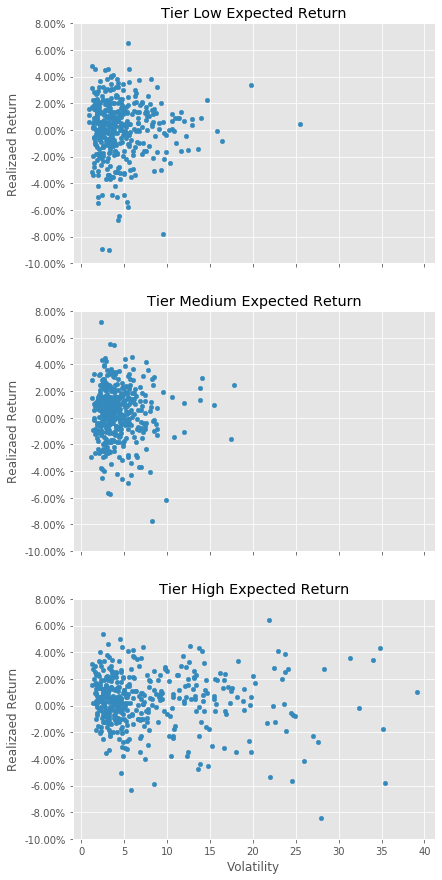

In [61]:
'''Scatter plots of realized returns against volatility'''
fig_pred, (ax0, ax1, ax2) = plt.subplots(nrows=3,ncols=1, figsize = (6.5,15), sharex=True)

df_pred.plot(kind='scatter', x='Vol_low', y='R_low', ax=ax0, legend=False)
ax0.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier Low Expected Return")
ax0.set_ylim(-0.1, 0.08)
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_pred.plot(kind='scatter', x='Vol_medium', y='R_medium', ax=ax1, legend=False)
ax1.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier Medium Expected Return")
ax1.set_ylim(-0.1, 0.08)
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in ax1.get_yticks()])

df_pred.plot(kind='scatter', x='Vol_high', y='R_high', ax=ax2, legend=False)
ax2.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier High Expected Return")
ax2.set_ylim(-0.1, 0.08)
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in ax2.get_yticks()])

In [58]:
'''Divide the prediction results into 11 tiers'''
dict_11tiers = {'Expected_return': {}, 'Realized_return':{}, 'Volatility':{}}

for i in range(100,523):
    exec("df_sort = df_ln_return_%s.sort_values(by='E_return', ascending=False)"%i)
    dict_11tiers['Expected_return'][i] = {}
    dict_11tiers['Realized_return'][i] = {}
    dict_11tiers['Volatility'][i] = {}
    
    dict_11tiers['Expected_return'][i][1] = df_sort[0:3]['E_return'].mean()
    dict_11tiers['Expected_return'][i][2] = df_sort[3:6]['E_return'].mean()
    dict_11tiers['Expected_return'][i][3] = df_sort[6:9]['E_return'].mean()
    dict_11tiers['Expected_return'][i][4] = df_sort[9:12]['E_return'].mean()
    dict_11tiers['Expected_return'][i][5] = df_sort[12:15]['E_return'].mean()
    dict_11tiers['Expected_return'][i][6] = df_sort[15:18]['E_return'].mean()
    dict_11tiers['Expected_return'][i][7] = df_sort[18:21]['E_return'].mean()
    dict_11tiers['Expected_return'][i][8] = df_sort[21:24]['E_return'].mean()
    dict_11tiers['Expected_return'][i][9] = df_sort[24:27]['E_return'].mean()
    dict_11tiers['Expected_return'][i][10] = df_sort[27:30]['E_return'].mean()
    dict_11tiers['Expected_return'][i][11] = df_sort[30:33]['E_return'].mean()

    dict_11tiers['Realized_return'][i][1] = df_sort[0:3]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][2] = df_sort[3:6]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][3] = df_sort[6:9]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][4] = df_sort[9:12]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][5] = df_sort[12:15]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][6] = df_sort[15:18]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][7] = df_sort[18:21]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][8] = df_sort[21:24]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][9] = df_sort[24:27]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][10] = df_sort[27:30]['Realized_return'].mean()
    dict_11tiers['Realized_return'][i][11] = df_sort[30:33]['Realized_return'].mean()

    dict_11tiers['Volatility'][i][1] = df_sort[0:3]['ATR'].mean()
    dict_11tiers['Volatility'][i][2] = df_sort[3:6]['ATR'].mean()
    dict_11tiers['Volatility'][i][3] = df_sort[6:9]['ATR'].mean()
    dict_11tiers['Volatility'][i][4] = df_sort[9:12]['ATR'].mean()
    dict_11tiers['Volatility'][i][5] = df_sort[12:15]['ATR'].mean()
    dict_11tiers['Volatility'][i][6] = df_sort[15:18]['ATR'].mean()
    dict_11tiers['Volatility'][i][7] = df_sort[18:21]['ATR'].mean()
    dict_11tiers['Volatility'][i][8] = df_sort[21:24]['ATR'].mean()
    dict_11tiers['Volatility'][i][9] = df_sort[24:27]['ATR'].mean()
    dict_11tiers['Volatility'][i][10] = df_sort[27:30]['ATR'].mean()
    dict_11tiers['Volatility'][i][11] = df_sort[30:33]['ATR'].mean()

df_E_return_11tiers = pd.DataFrame(dict_11tiers['Expected_return']).T
df_R_return_11tiers = pd.DataFrame(dict_11tiers['Realized_return']).T
df_vol_11tiers = pd.DataFrame(dict_11tiers['Volatility']).T

df_E_return_11tiers.rename(columns={1:'E_1', 2:'E_2', 3:'E_3', 4:'E_4', 5:'E_5', 6:'E_6', 7:'E_7', 8:'E_8', 9:'E_9', 10:'E_10', 11:'E_11'},\
                           inplace = True)
df_R_return_11tiers.rename(columns={1:'R_1', 2:'R_2', 3:'R_3', 4:'R_4', 5:'R_5', 6:'R_6', 7:'R_7', 8:'R_8', 9:'R_9', 10:'R_10', 11:'R_11'},\
                           inplace = True)
df_vol_11tiers.rename(columns={1:'v_1', 2:'v_2', 3:'v_3', 4:'v_4', 5:'v_5', 6:'v_6', 7:'v_7', 8:'v_8', 9:'v_9', 10:'v_10', 11:'v_11'},\
                           inplace = True)

df_E_return_11tiers['dates'] = Dates[99:522]
df_R_return_11tiers['dates'] = Dates[99:522]
df_vol_11tiers['dates'] = Dates[99:522]

df_pred_11tiers = df_E_return_11tiers.merge(df_R_return_11tiers, how='outer', on='dates')
df_pred_11tiers = df_pred_11tiers.merge(df_vol_11tiers, how='outer', on='dates')

[Text(0, 0.5, 'Realizaed Return'),
 Text(0.5, 0, 'Volatility'),
 Text(0.5, 1.0, 'Tier 1 Expected Return')]

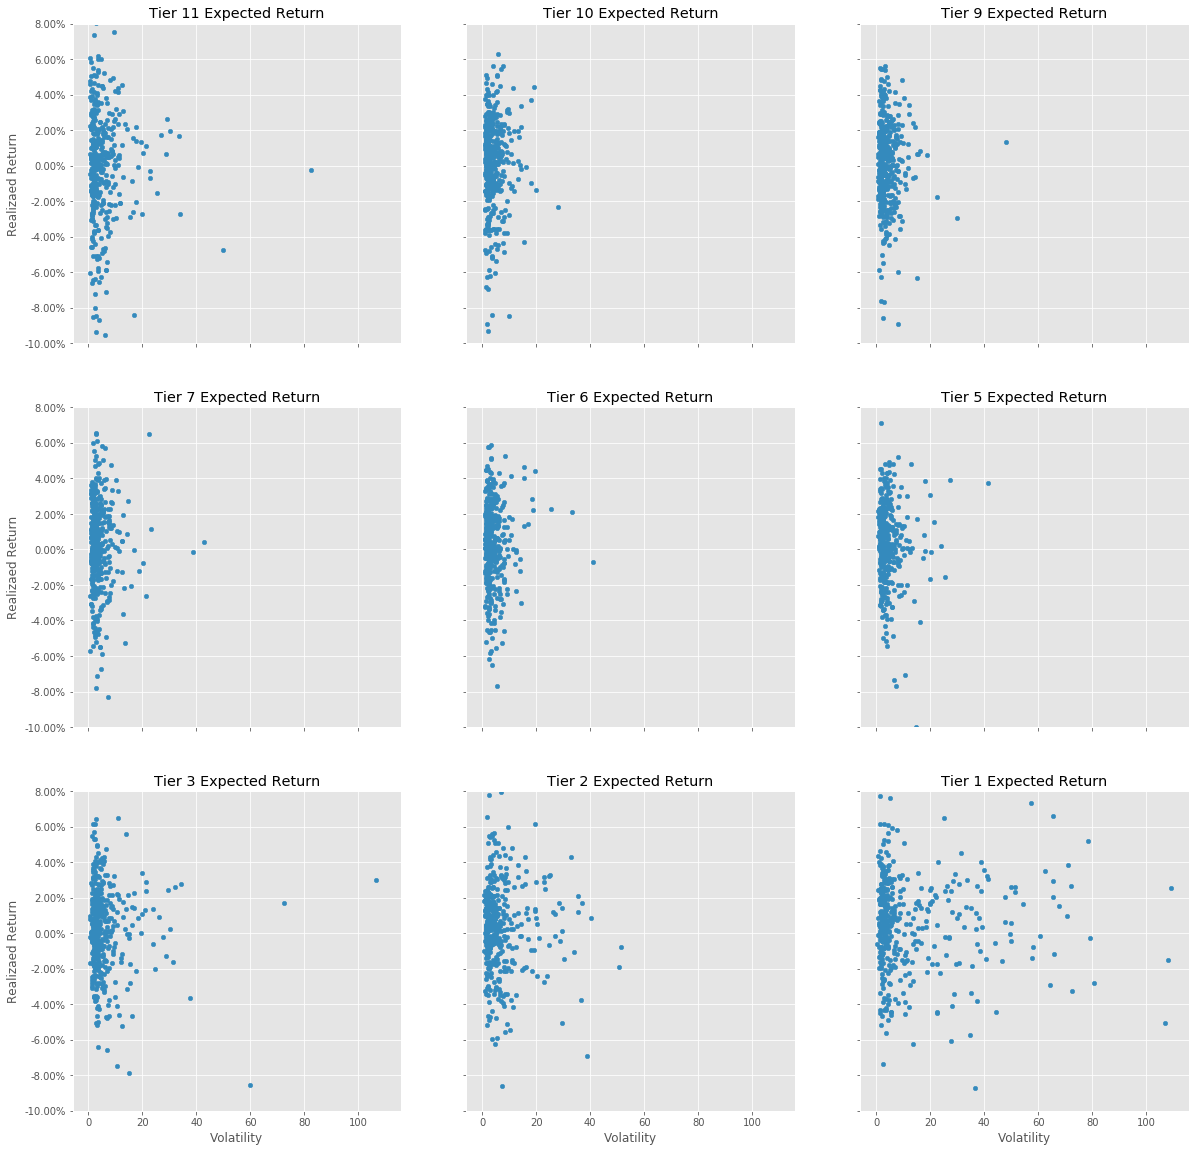

In [62]:
'''Scatter plots of realized returns against volatility'''
fig_pred_11tiers, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(nrows=3,ncols=3, figsize = (20,20), sharex=True, sharey=True)

#From tier 1 to tier 11, expected returns are decreasing
df_pred_11tiers.plot(kind='scatter', x='v_11', y='R_11', ax=ax0, legend=False)
ax0.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 11 Expected Return")
ax0.set_ylim(-0.1, 0.08)
ax0.set_yticklabels(['{:,.2%}'.format(x) for x in ax0.get_yticks()])

df_pred_11tiers.plot(kind='scatter', x='v_10', y='R_10', ax=ax1, legend=False)
ax1.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 10 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_9', y='R_9', ax=ax2, legend=False)
ax2.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 9 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_7', y='R_7', ax=ax3, legend=False)
ax3.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 7 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_6', y='R_6', ax=ax4, legend=False)
ax4.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 6 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_5', y='R_5', ax=ax5, legend=False)
ax5.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 5 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_3', y='R_3', ax=ax6, legend=False)
ax6.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 3 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_2', y='R_2', ax=ax7, legend=False)
ax7.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 2 Expected Return")
df_pred_11tiers.plot(kind='scatter', x='v_1', y='R_1', ax=ax8, legend=False)
ax8.set(xlabel='Volatility', ylabel='Realizaed Return', title="Tier 1 Expected Return")